<h1 id="tocheading">Table of Contents</h1>
<div id="toc"></div>

## Ames Housing Dataset- Introduction
Success! Your submission appears on this page. The submission confirmation number is caa8de1b-af27-48c1-93e3-83c279c1b304. Copy and save this number as proof of your submission. View all of your submission receipts in My Grades.

  Dataset: The Housing dataset is taken from the Kaggle website. The dataset consists of  explanatory variables which describes almost every aspect of residential homes in Amess,Iowa.
  
  Objective: To predict the final price of each home
  
    -Linear Regression
    -Random Forest
    -Gradient Boosting
    -Extra Trees
    -Ridge
    -ElasticNet

In [1]:
import urllib
import requests
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [2]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

In [3]:
# Downloaded housing dataset from the Kaggle website
#C:\Users\email\Downloads
pathname = "C:/Users/email/Downloads/"
house = pd.read_csv(pathname + "train.csv") 
df_test = pd.read_csv(pathname + "test.csv")

# displaying first 3 rows
house[:3]


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [4]:
# checking the shape of the dataframe(rows,columns)
#house.shape #1460,81


In [5]:
# checking full information 
#house.info()


### Housing Data Info:
1. Dataset description: the dataset has 1460 observations and 81 variables. 
2. Objective: A supervised learning to learn the relationship between the independent variables such as 'BedroomAbvGr,"OverallQual", "LotArea","GarageType","KitchenQual","GrLivArea","PavedDrive" and the  dependent variable which is Sale price of the house.
Altogether, 43 categorical and 38 numeric independent variables.

In [7]:
# Let's check columns with missing values
nulls = house.isnull().sum()
nulls[nulls > 0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

As we see result of the missing values, out of 1460 observations - Alley, PoolQC, Fence, MiscFeature & FireplaceQu have more than 94%,99.5%,81%,96%,47% of the missing values.

In [8]:
# Dropping Id(non-informative) and all variables with more than 20% null values
# Also, bldgType can be represented by MSSubClass
df = house.drop(['Id','Alley','FireplaceQu','PoolQC','MiscFeature','Fence'], axis=1)

In [9]:
# MSSubClass listed as integer but it's a categorical variable, let's convert it
df['MSSubClass'] = df['MSSubClass'].astype(object)

In [10]:
# Filling every categorical column with missing values by its own most frequent value
df = df.apply(lambda x:x.fillna(x.value_counts().index[0]))
# let's check the status
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [11]:
# Replacing null values with median for numeric variables
df.fillna(df.mean(), inplace=True)

In [12]:
# let's check back NA
nulls = df.isnull().sum()
nulls[nulls > 0]

# no NA values

Series([], dtype: int64)

### Exploratory Data Analysis

In [13]:
# collecting half of the categorical features
categorical_features1 = ['MSSubClass','MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope',
                        'Neighborhood','Condition1','Condition2', 'BldgType','HouseStyle','RoofStyle',
                        'RoofMatl','Exterior1st','Exterior2nd','MasVnrType',
                        'ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond']

In [14]:
# checking counts of different values of following features
#df['MSSubClass'].value_counts()
#df['MSZoning'].value_counts()
#df['Street'].value_counts()
#df['LotShape'].value_counts()
#df['LandContour'].value_counts()
#df['Utilities'].value_counts()
#df['LotConfig'].value_counts()
#df['LandSlope'].value_counts()
#df['Neighborhood'].value_counts()
#df['Condition1'].value_counts()
#df['Condition2'].value_counts()
#df['BldgType'].value_counts()
#df['HouseStyle'].value_counts()
#df['OverallQual'].value_counts()
#df['OverallCond'].value_counts()

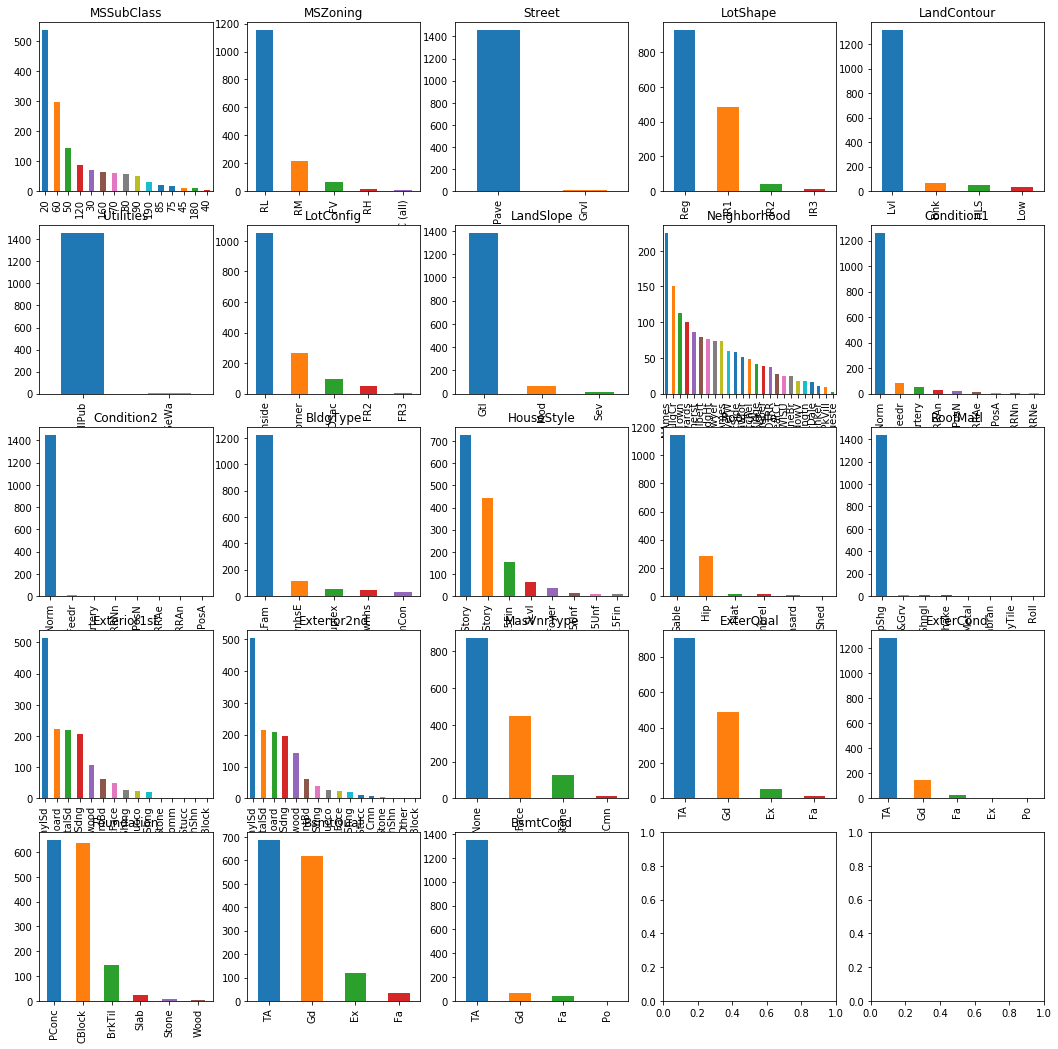

In [15]:
# Let's see the plot of categorical_features1 
ROWS, COLS = 5,5
fig, ax = plt.subplots(ROWS, COLS, figsize=(18,18))
row, col = 0, 0
for i, categorical_feature1 in enumerate(categorical_features1):
    if col == COLS - 1:
        row += 1
    col = i % COLS
    df[categorical_feature1].value_counts().plot('bar', ax=ax[row, col]).set_title(categorical_feature1)

#### Interpretaion of Categorical features 1: 
People definitely preferred houses with normal condition,paved street, having all public utilities, stabdard shingles as roof material and overall typical condition in residential homes in Ames, Iowa.

 MSSubClass -  37% instances have  '1-STORY 1946 & NEWER ALL STYLES' 
    while only .2% instances have '1-STORY W/FINISHED ATTIC ALL AGES'
    
 MSZoning: 79% houses with 'Residential Low Density' ;
 
 Street: 99% house with Paved street.
 
 Regular Lot shape is in 63% of the houses
 
 Near Flat/Level is in around 90% of the houses 
 
 All public Utilities are in 99.9%  of the houses.
 
 72% house with 'Inside lot(configuration)'.
 
 95% house with Gentle Slope(LandSlope)
 
 North Ames(Neighborhood) present in 15% of houses
 
 86% houses with 'Norm'(condition1)
 
 98.9% houses with 'Norm'(condition2)
 
 83.5% houses with '1 family' dwelling type
 
 50% houses with '1 story' dwelling style
 
 27% houses with average overall quality 
 
 56% huses with average overall condition
 
 98% houses have standard shingle as roof material
 
 62% average quality houses
 
 88% average/typical conditioned houses
 
 47% Typical height of the basement
 
 92% Typical condition of the house

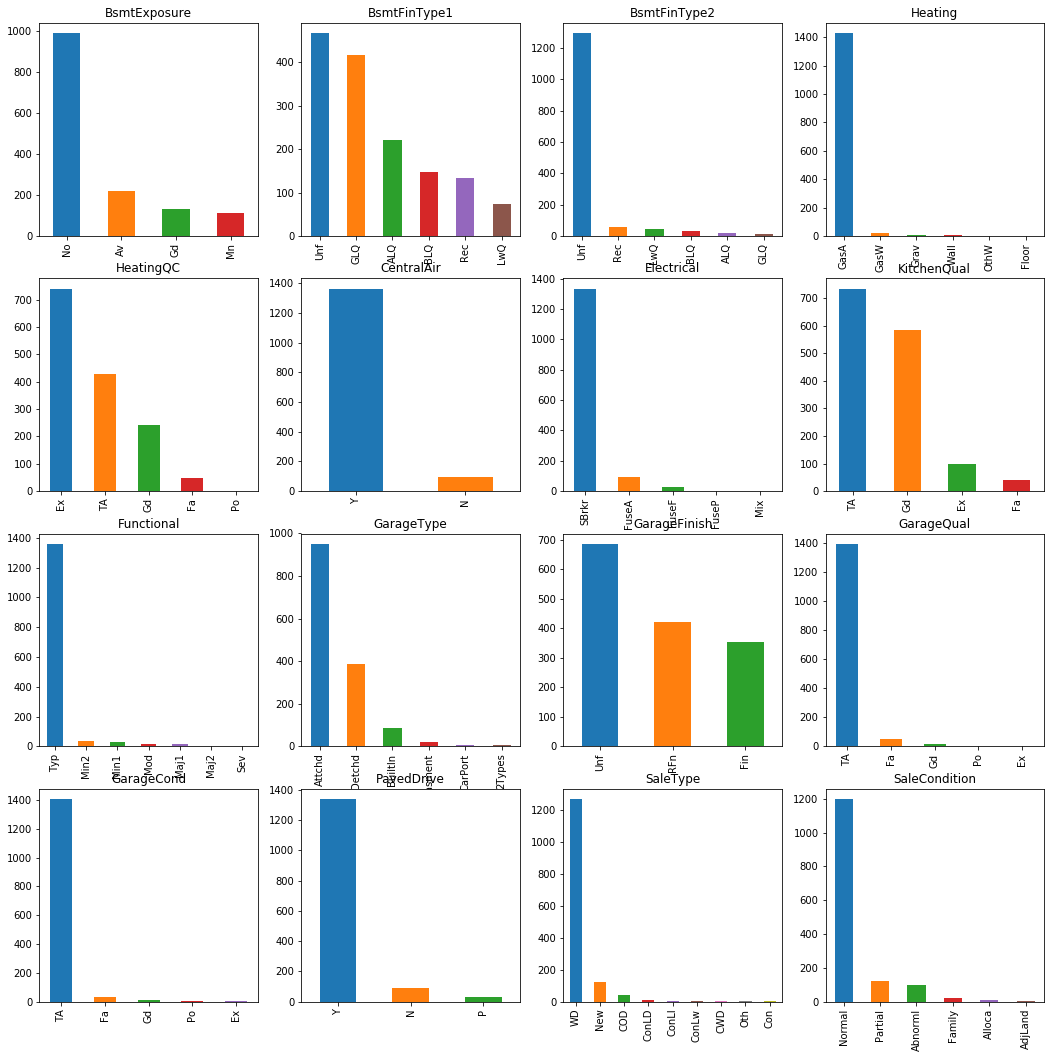

In [16]:
categorical_features2 = ['BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC',
                       'CentralAir','Electrical','KitchenQual','Functional','GarageType',
                        'GarageFinish','GarageQual','GarageCond',
                      'PavedDrive','SaleType','SaleCondition']
ROWS, COLS = 4,4
fig, ax = plt.subplots(ROWS, COLS, figsize=(18,18))
row, col = 0, 0
for i, categorical_feature2 in enumerate(categorical_features2):
    if col == COLS - 1:
        row += 1
    col = i % COLS
    df[categorical_feature2].value_counts().plot('bar', ax=ax[row, col]).set_title(categorical_feature2)

In [17]:
# counting the unique values in categorical features
#df['Heating'].value_counts() # 97.8%(GasA)
#df['GarageType'].value_counts() #65% (Attchd)
#df['GarageFinish'].value_counts() #46.9%(Unf)
#df['GarageCond'].value_counts() # 96.3%(TA)
#df['Functional'].value_counts() # 93% (TYp)
#df['GarageQual'].value_counts() # 95%(TA)
#df['SaleType'].value_counts() # 86.7%(WD)
#df['HeatingQC'].value_counts() # 50.7%(Ex)
#df['SaleCondition'].value_counts() #82%(Normal)
#df['Electrical'].value_counts() # 91%(SBrkr)
#df['BsmtFinType2'].value_counts() # 88.6%(Unf)
#df['BsmtExposure'].value_counts() # 68% (No)


#### Interpretation of categorical features2:
Residential Homes with Gas forced warm air furnace,  having typical functionality, garage condition & quality and standard electrical sytem as must have attributes.


 97.8% houses have 'Gas forced warm air furnace'
 
 65% houses have garage 'attached to home'
 
 46.9% houses have  'unfinished' garage
 
 96.3% houses have 'typical' garage condition
 
 93% houses have typical functionality
 
 95% typical garage quality
 
 86.7% houses are sold by warranty deed
 
 Around 51% houses are having excellent heating quality
 
 82% houses were in normal condition of sale
 
 91% houses with 'Standard Circuit Breakers & Romex' electrical system
 
 89% houses with unfinished basement area if having multiple types
 
 68% houses with no basement exposure



#### Let's check out analysis with numerical variables

In [18]:
# descriptive statistics for 'numeric'  variables.
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,68.267123,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,22.356355,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,63.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Average overall quality of the house is "above average" with average sale price of $180K. The houses sold in this dataset are on an average built in the year 1971 with variation of 30 years. And, the houses sold on an average in the year 2007 with variation of 1 year. Outliers can be seen in SalePrice, OverQual, BsmtFinSF1,BsmtUnfSF, EnclosedPorch(75% of the house don't have), and similar pattern can be seen for PoolArea, 3SsnPorch, ScreenPorch, MiscVal.

In [19]:
# creating data frame using all integer type variables
num_df1 = df.select_dtypes(include=['int64']).copy()
#num_df1

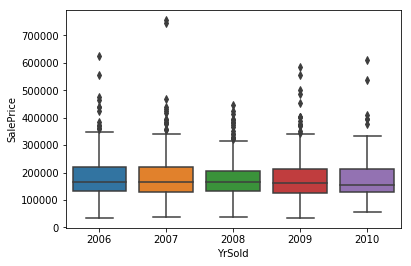

In [20]:
import seaborn as sns

#let's check relationship between price and year of house sale
sns.boxplot(y='SalePrice', x='YrSold', data=df)


As we see in the plot, median sale price has decreased in 2010 in comparison to previous years whereas house sale in 2008 has lowest interquartile range

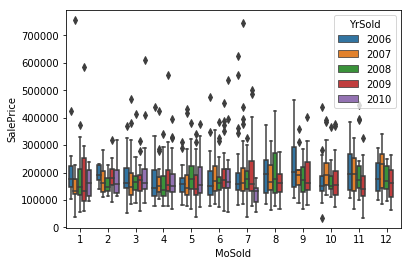

In [21]:
# plot showing relationship between 3 variables
sns.boxplot(y='SalePrice', x='MoSold',hue='YrSold', data=df)

March to november of 2006 looks better in sale price with slight decline in May,July & October.
Second half of the year 2007 looks better in sale price except september

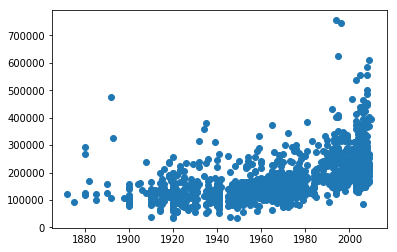

In [22]:
# scatter plot depicting relationship between construction year and price of the house
plt.scatter(x=df['YearBuilt'],y=df['SalePrice'])
ax =plt.gca()
ax.get_yaxis().get_major_formatter().set_scientific(False)
plt.draw()


There are more instances of houses built after 1920 and sale price were under $200k for most homes till 1960 and looks like prices started going up after that year consistently. Thus, higher price houses were built in and around year 2000

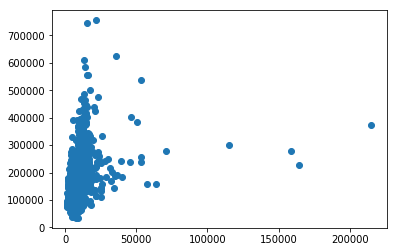

In [24]:
# scatter plot between lot size and price of the house
plt.scatter(x=df['LotArea'],y=df['SalePrice'])
ax =plt.gca()
ax.get_yaxis().get_major_formatter().set_scientific(False)
plt.draw()
#sns.boxplot(y='SalePrice', x='LotArea', data=df)


75% of houses are above 11K square feet and $214K as sale price.
We can clearly see that there are five outliers in the lot area.

In [711]:
# let's check out last 4 outliers in lot area
df.sort_values('LotArea').tail(4)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
706,20,RL,60.0,115149,Pave,IR2,Low,AllPub,CulDSac,Sev,...,0,0,0,0,0,6,2007,WD,Normal,302000
249,50,RL,60.0,159000,Pave,IR2,Low,AllPub,CulDSac,Sev,...,0,0,0,0,500,6,2007,WD,Normal,277000
335,190,RL,60.0,164660,Grvl,IR1,HLS,AllPub,Corner,Sev,...,0,0,0,0,700,8,2008,WD,Normal,228950
313,20,RL,150.0,215245,Pave,IR3,Low,AllPub,Inside,Sev,...,0,0,0,0,0,6,2009,WD,Normal,375000


It's worth noticing that severe landslope is common in last four outliers and sale price range is 225K to 375K.

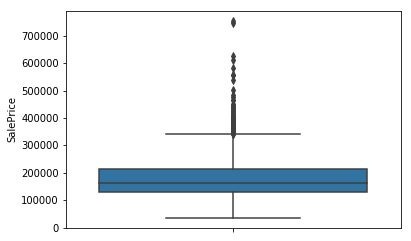

In [565]:
# EDA on target variable "SalePrice"
sns.boxplot(y='SalePrice', data=df) 

In [710]:
# Let's check outliers for Sale price
#df.sort_values('SalePrice').tail(5)
num_df1.sort_values('SalePrice').tail(5)

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
803,13891,9,5,2008,2009,0,0,1734,1734,1734,...,52,170,0,0,192,0,0,1,2009,582933
898,12919,9,5,2009,2010,2188,0,142,2330,2364,...,0,67,0,0,0,0,0,3,2010,611657
1169,35760,10,5,1995,1996,1387,0,543,1930,1831,...,361,76,0,0,0,0,0,7,2006,625000
1182,15623,10,5,1996,1996,2096,0,300,2396,2411,...,171,78,0,0,0,555,0,7,2007,745000
691,21535,10,6,1994,1995,1455,0,989,2444,2444,...,382,50,0,0,0,0,0,1,2007,755000


Last 4 higher sale price is for house which has slightly irregular,Low density residential area,excellent condition,built after 1993 and garage area is over 800 hundred square feet.

In [567]:
# Scatter plot visuals for numeric variables
x_vars= ['OverallQual','TotalBsmtSF','1stFlrSF','GrLivArea']

In [568]:
#Statistical summary of numerical variables
#df['OverallQual'].describe()
#df['TotalBsmtSF'].describe()
#df['1stFlrSF'].describe()
#df['GrLivArea'].describe()
#checking 10 outliers in 1st floor Square feet area
# num_df1.sort_values('1stFlrSF').tail(10)

# checking all outliers in Overall quality of the house
# num_df1.sort_values('OverallQual').tail(18) # there are 18 rows with '10'(very excellent)
# checking all outliers in total basement sq. ft. of the house
# num_df1.sort_values('TotalBsmtSF').tail(5)

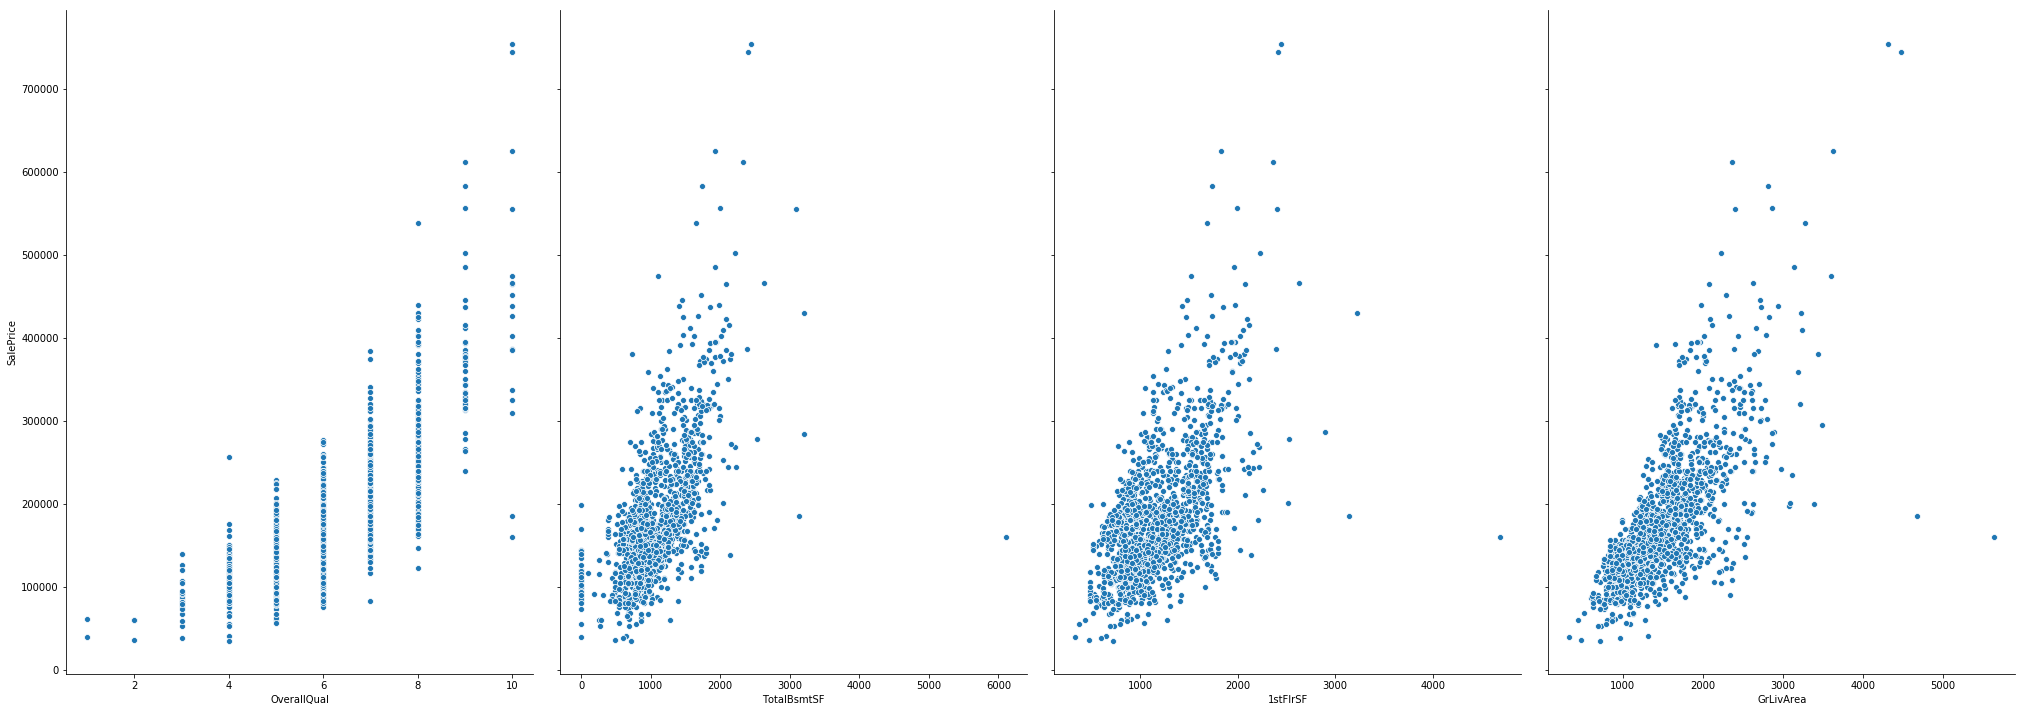

In [722]:
# plotting against the target variable
sns.pairplot(df, x_vars =['OverallQual','TotalBsmtSF','1stFlrSF','GrLivArea'],y_vars='SalePrice',size = 10,aspect=0.7)

#### Interpretaion:
Very excellent overall quality house got the highest sale price

 House with total basement square feet area ranging from 2.3K to 2.4K got the highest sale price.
 
House with Sale price over $400K are having 1st floor area in the range of 2.2K sq.ft. to 3.2K sq.ft.

Above ground living area is positively correlated with Sale price of the house which means sale price increases as above ground living area increases.

In [709]:
# exploring next four numeric variables 
#x_vars=['FullBath','GarageCars','GarageArea','TotRmsAbvGrd']
#Statistical summary of numerical variables
#df['FullBath'].describe()
#df['GarageCars'].describe()
#df['GarageArea'].describe()
#df['TotRmsAbvGrd'].describe()
num_df1.sort_values('GarageCars').tail(5)

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
1340,8294,4,5,1971,1971,0,0,858,858,872,...,0,0,0,0,0,0,0,6,2007,123000
1190,32463,4,4,1961,1975,1159,0,90,1249,1622,...,439,0,0,0,0,0,0,3,2007,168000
1350,11643,5,5,1969,1969,500,0,748,1248,1338,...,0,0,0,0,0,0,0,8,2009,200000
747,11700,7,7,1880,2003,0,0,1240,1240,1320,...,181,0,386,0,0,0,0,5,2009,265979
420,7060,7,5,1997,1998,1309,0,35,1344,1344,...,0,0,0,0,0,0,0,11,2008,206300


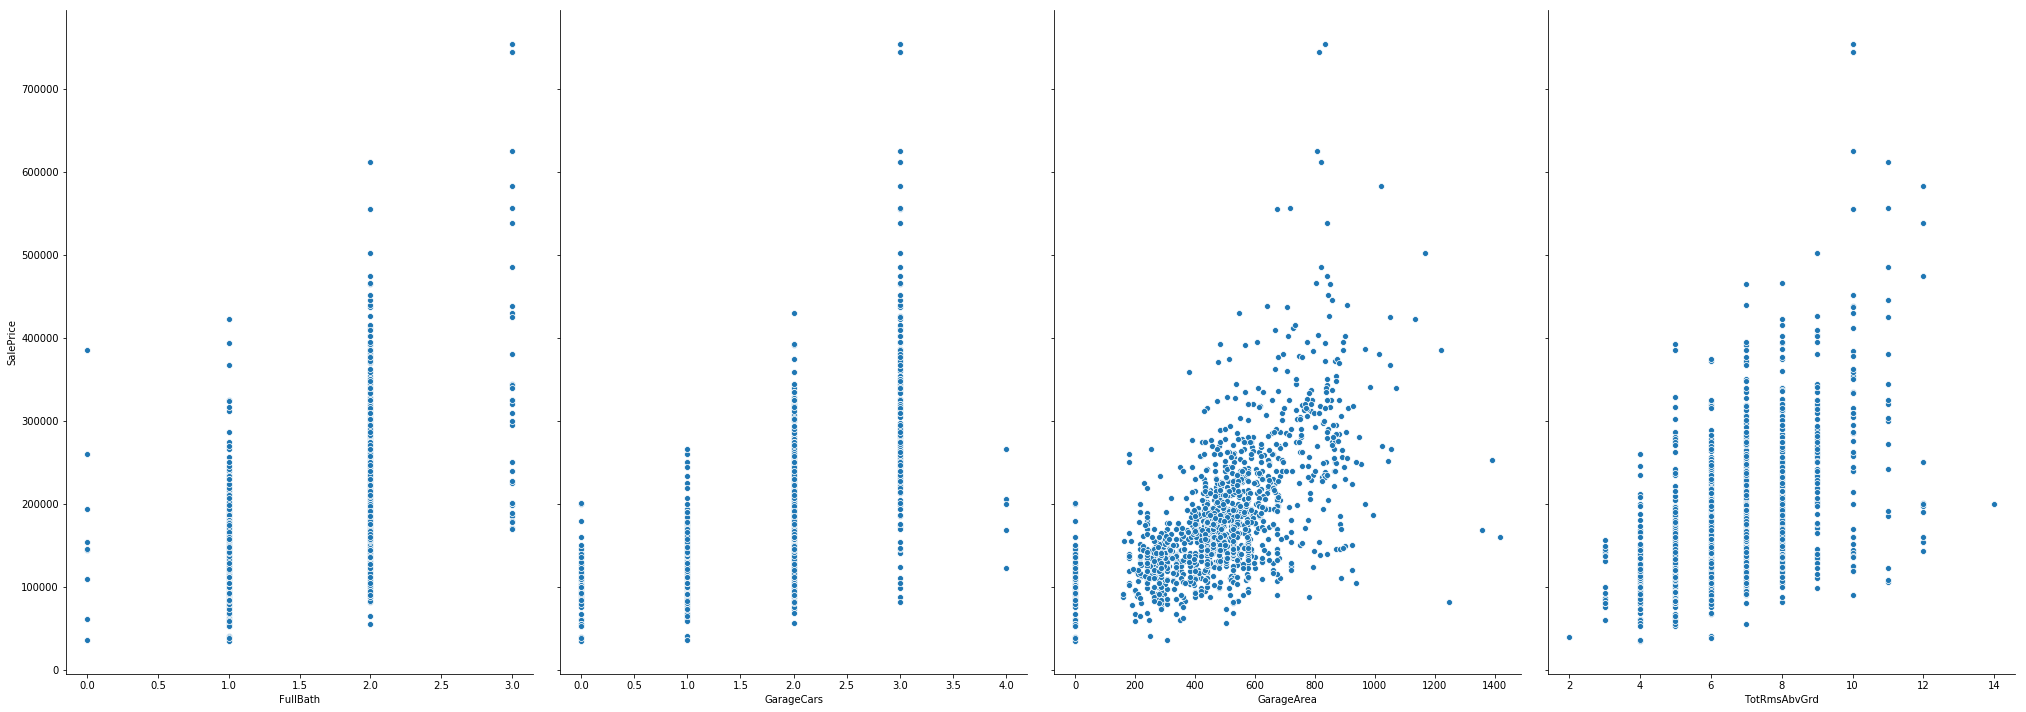

In [571]:
# showing correlation with target variable
sns.pairplot(df, x_vars =['FullBath','GarageCars','GarageArea',
                          'TotRmsAbvGrd'],y_vars='SalePrice',size = 10,aspect=0.7)

#### Interpretation:
We can notice in above plot that 1 full bath can go maximum sale price of 400K, sale price for 2 full bath is max 600k. Lastly, sale price for 3 full bath can start from 200k and go upto 700K but those instances are very less.
 Many Homes with 3 garage cars with high sale price while there are significant number of intances of 2,1 & 0 garage respectively. Some outliers are also present of 4 garage cars.
 Average garage area is 473 square  feet and positively correlated with Sale price.
 Median value for total rooms above ground is 6 rooms with 1 outlier of 14 rooms.

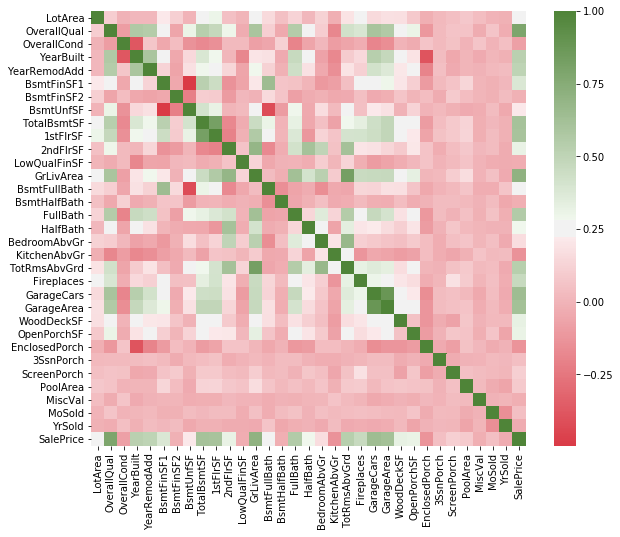

In [712]:
# Now, checking correlation coefficient of numeric variables
# Visual representation of num_df1 using seaborn :
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

#num.df = df.select_dtypes([np.number]).columns
f, ax = plt.subplots(figsize=(10, 8))
corr = num_df1.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(10,120, as_cmap=True),
            square=True, ax=ax)

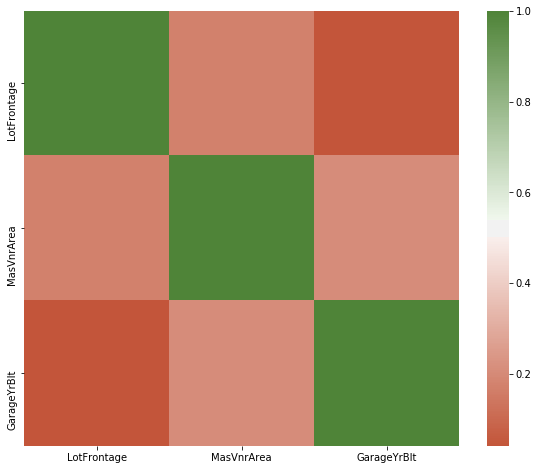

In [713]:
# creating data frame using all float type variables
num_df2 = df.select_dtypes(include=['float64']).copy()
num_df2
# Visual representation of num_df2 using seaborn :
f, ax = plt.subplots(figsize=(10, 8))
corr = num_df2.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(20,120, as_cmap=True),
            square=True, ax=ax)


### Listed below is Correlation coefficient between IV and DV(SalePrice)

LotFrontage   0.33477085 ;

LotArea       0.26384335 ;

OverallQual   0.79098160;
OverallCond  -0.07785589;
YearBuilt     0.52289733;
YearRemodAdd  0.50710097;
MasVnrArea    0.47261450;
BsmtFinSF1    0.38641981;
BsmtFinSF2   -0.01137812 ;
BsmtUnfSF     0.21447911 ;
TotalBsmtSF   0.61358055;
1stFlrSF      0.60585218;
2ndFlrSF      0.31933380;
LowQualFinSF -0.02560613;
GrLivArea     0.70862448;
BsmtFullBath  0.22712223;
BsmtHalfBath -0.01684415;
`````````````````````````````````
High-correlation variables are(+50%): OverallQual;YearBuilt;TotalBsmtSF;1stFlrSF;GrLivArea;FullBath;GarageCars;GarageArea;TotRmsAbvGrd;YearRemodAdd
````````````````````````````````````````````
FullBath       0.56066376;  
HalfBath       0.28410768 ; 
BedroomAbvGr   0.16821315  ;
KitchenAbvGr  -0.13590737  ;
TotRmsAbvGrd   0.53372316  ;
Fireplaces     0.46692884  ;
GarageYrBlt    0.46675365  ;
GarageCars     0.64040920  ;
GarageArea     0.62343144  ;
WoodDeckSF     0.32441344  ;
OpenPorchSF    0.31585623  ;
EnclosedPorch -0.12857796 ;
3SsnPorch      0.04458367;
ScreenPorch    0.11144657;
PoolArea       0.09240355;
MiscVal       -0.02118958;
MoSold         0.04643225;
YrSold        -0.02892259;

As we see above plot and correlation coefficient,I'd keep IV that has above +/-20%  correlation with the DV such as LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,
TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr(-14%),TotRmsAbvGrd, Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch(-13%),ScreenPorch.

Therefore,I'd discard following: OverallCond,BsmtFinSF2,LowQualFinS,LowQualFinSF,BsmtHalfBath,3SsnPorch,PoolArea,MiscVal,
MoSold,YrSold,BedroomAbvGr,KitchenAbvGr,EnclosedPorch,ScreenPorch,

In [726]:
# First, designating target variable name
targetName = 'SalePrice'
targetSeries = df[targetName]
#remove target from current location and insert in column 0
del df[targetName]
df.insert(0, targetName, targetSeries)
#targetSeries is the new target 

### Let's start Model Training

### Importing All Required Modules

In [727]:
# All required packages
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report
from sklearn import tree 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import scipy.stats as ss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import learning_curve, GridSearchCV
import time 
from operator import itemgetter
import os
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

### Data Transformation

In [728]:
# perform data transformation
for col in df.columns:
	attName = col
	dType = df[col].dtype
	missing = pd.isnull(df[col]).any()
	uniqueCount = len(df[attName].value_counts(normalize=False))
	# discretize (create dummies)
	if dType == object:
		df = pd.concat([df, pd.get_dummies(df[col], prefix=col)], axis=1)
		del df[attName]

In [729]:
# Let's check first 3 rows after trasformation 
df[:3]
# now, we have total 270 columns

,SalePrice,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,208500,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,1,0,0,0,0,1,0
1,181500,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,1,0,0,0,0,1,0
2,223500,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,1,0,0,0,0,1,0


### Data Partition

In [730]:
# separating target and features
from sklearn.model_selection import train_test_split
# splitting dataset into testing and training
X_train, X_test, y_train, y_test = train_test_split(
    df.iloc[:,1:].values, df.iloc[:,0].values, test_size=0.30, random_state=4)

In [731]:
# let's see the datasets' dimension
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(1022, 284)
(1022,)
(438, 284)
(438,)


### Linear Regression Model

In [732]:
# Linear Regression
from sklearn.linear_model import LinearRegression
# instantiating
lin_reg = LinearRegression()
# fitting
lin_reg.fit(X_train, y_train)
# predicting
y_pred = lin_reg.predict(X_test)

In [733]:
# Mean absolute error(ME)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
# MSE
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
#RMSE
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# let's check r^2
print('Linear regression R-squared": %.4f' % lin_reg.score(X_test, y_test))


Mean Absolute Error: 18174.963115799557
Mean Squared Error: 690414553.1235
Root Mean Squared Error: 26275.74077211716
Linear regression R-squared": 0.8708


So, in our model, 87% of the variability in Y can be explained using X. 
This looks good!
Linear regression model was able to predict the value of every house in the test set within $26275 of the real price.

### Random Forest Models

In [734]:
# Let's try Random Forest model
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
RfModel = RandomForestRegressor(random_state=1, max_depth=10)
# fitting the model
RfModel.fit(X_train,y_train)
# make predictions
y_pred = RfModel.predict(X_test)

In [735]:
# Mean absolute error(ME)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
# MSE
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
#RMSE
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# let's check r^2
print('Random Forest R squared": %.4f' % RfModel.score(X_test, y_test))


Mean Absolute Error: 17986.09720031596
Mean Squared Error: 691374584.3157388
Root Mean Squared Error: 26294.002820334124
Random Forest R squared": 0.8706


R^2 is as good as linear model!, let's see the important features

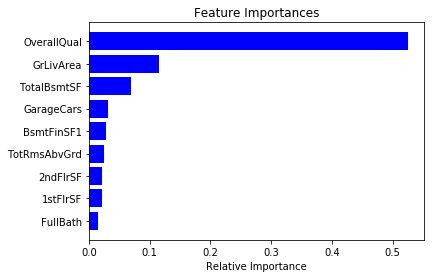

In [736]:
# Finding the most important features
# storing all feature names
feature_names = df.columns[1:]
#feature_names
importances = RfModel.feature_importances_
indices = np.argsort(importances)[-9:]  # top 10 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Based on the above graph, we can hand pick the top-most features to reduce the dimensionality in our dataset.

In [737]:
# Let's see important features in tabular form
import pandas as pd
feature_importances = pd.DataFrame(RfModel.feature_importances_,index =  df.columns[1:],
                                    columns=['importance']).sort_values('importance',ascending=False)
feature_importances[:10]

,importance
OverallQual,0.525140
GrLivArea,0.114794
TotalBsmtSF,0.069322
GarageCars,0.031417
BsmtFinSF1,0.028634
TotRmsAbvGrd,0.024426
2ndFlrSF,0.021874
1stFlrSF,0.020929
FullBath,0.014273
LotArea,0.013519


In [738]:
df2 = df[['SalePrice','OverallQual','GrLivArea','TotalBsmtSF','GarageCars','BsmtFinSF1','TotRmsAbvGrd','1stFlrSF','MasVnrArea','LotArea']].copy()
X2 = df2.iloc[:,1:].values 
#X2
y2=df2.iloc[:,0].values
# Partitioning the data with 80/20 split
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=0)

In [739]:
# this model contains all important features only with the same parameters as above
from sklearn.ensemble import RandomForestRegressor
RfModel2 = RandomForestRegressor(random_state=1, max_depth=10)
# fitting the model
RfModel2.fit(X2_train,y2_train)
# making predictions
y_pred2 = RfModel2.predict(X2_test)

In [740]:
# Evaluating the algorithm
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y2_test, y_pred2))  
print('Mean Squared Error:', metrics.mean_squared_error(y2_test, y_pred2))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y2_test, y_pred2)))
# let's check r^2
print('Random Forest R squared": %.4f' % RfModel2.score(X2_test, y2_test))

Mean Absolute Error: 20444.173868350685
Mean Squared Error: 1159512331.6421642
Root Mean Squared Error: 34051.612761250595
Random Forest R squared": 0.8321


With R^2 = 83%, we observed that training model with only important features did not improve the model.

In [741]:
# Now, trying with 100 estimators
from sklearn.ensemble import RandomForestRegressor
RfModel3 = RandomForestRegressor(n_estimators=100, random_state=0)  
# Fitting the model
RfModel3.fit(X_train, y_train) 
# making predictions
y_pred3 = RfModel3.predict(X_test)

In [743]:
# Evaluating the algorithm
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred3))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred3))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred3)))
# let's check r^2
print('Random Forest R squared": %.4f' % RfModel3.score(X_test, y_test))

Mean Absolute Error: 16374.952237442923
Mean Squared Error: 578259992.3970228
Root Mean Squared Error: 24047.03708145814
Random Forest R squared": 0.8918


R^2 looks better than previous 3 models!

In [783]:
# Can we better than this,trying again with 200 estimators
from sklearn.ensemble import RandomForestRegressor
# instantiating
RfModel4 = RandomForestRegressor(n_estimators=200, random_state=0) 
# fitting
RfModel4.fit(X_train, y_train)  
# predicting
y_pred4 = RfModel4.predict(X_test)

In [784]:
# Evaluating 
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred4))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred4))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred4)))
print('Random Forest R squared": %.4f' % RfModel4.score(X_test, y_test))

Mean Absolute Error: 16333.20928082192
Mean Squared Error: 578440650.864092
Root Mean Squared Error: 24050.793144179093
Random Forest R squared": 0.8917


Hmmm...this isn't improving the model, same as previous model
let's check more...

In [785]:
from sklearn.model_selection import *
scores = cross_val_score(RfModel4, X_train, y_train, cv=5)
print("Average coefficient of determination using 5-fold cross-validation:",np.mean(scores))

Average coefficient of determination using 5-fold cross-validation: 0.8228578895666979


In [780]:
# Trying with 500 estimators
from sklearn.ensemble import RandomForestRegressor

RfModel5 = RandomForestRegressor(n_estimators=500, random_state=42)  
RfModel5.fit(X_train, y_train)  
y_pred5 = RfModel5.predict(X_test)

In [781]:
# Evaluating the algorithm
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred5))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred5))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred5)))
print('Random Forest R squared": %.4f' % RfModel5.score(X_test, y_test))

Mean Absolute Error: 16341.445789954336
Mean Squared Error: 569224761.7096522
Root Mean Squared Error: 23858.431669111284
Random Forest R squared": 0.8934


Now, again R^2 is around as all the above models !

In [782]:
from sklearn.model_selection import *
scores = cross_val_score(RfModel5, X_train, y_train, cv=5)
print("Average coefficient of determination using 5-fold cross-validation:",np.mean(scores))

Average coefficient of determination using 5-fold cross-validation: 0.8240182401843181


In [748]:
# Trying with 1000 estimators
from sklearn.ensemble import RandomForestRegressor

RfModel6 = RandomForestRegressor(n_estimators=1000, random_state=0)  
RfModel6.fit(X_train, y_train)  
y_pred6 = RfModel6.predict(X_test)

In [749]:
# Evaluating the algorithm
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred6))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred6))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred6)))
print('Random Forest R squared: %.4f' % RfModel6.score(X_test, y_pred6))

Mean Absolute Error: 16341.423433789954
Mean Squared Error: 573239976.5633161
Root Mean Squared Error: 23942.430464832014
Random Forest R squared: 1.0000


This looks really good...100% , is it too good to be true!
If R^2==1 then model is probably being overfit.To choose a better model, we take high R^2 or a low RMSE.
For MSE, the smaller it is, the closer the model prediction is to the actual data. So basically, either a high R2 or a low MSE.(https://stats.stackexchange.com/questions/100281/selecting-the-best-model-using-cross-validation-on-coefficient-of-determination )
Let's check overfitting using CV=5

In [750]:
from sklearn.model_selection import *
scores = cross_val_score(RfModel6, X_train, y_train, cv=5)
print("Average coefficient of determination using 5-fold cross-validation:",np.mean(scores))

Average coefficient of determination using 5-fold cross-validation: 0.8252415311903791


Cross-validated average R^2 is around 83% which is 17 points further from train/split model R^2.It's overfitiing.


### Gradient Boosting Models

In [751]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()  
X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test)

In [758]:
# training GB with default settings
from sklearn import ensemble
from sklearn.ensemble import GradientBoostingRegressor
GDR_model = ensemble.GradientBoostingRegressor(random_state=0)
GDR_model.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=0, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [759]:

# Evaluating the algorithm
from sklearn import metrics
y_pred_GDR = GDR_model.predict(X_test)
#model_mse = mean_squared_error(y_pred_GDR, y_test)
#model_rmse = np.sqrt(model_mse)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_GDR))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_GDR)) 
#print('Gradient Boosting RMSE: %.4f' % model_rmse)
print('GDR Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_GDR)))
print('Gradient Boosting R squared": %.4f' % GDR_model.score(X_test, y_test))

Mean Absolute Error: 15329.556196264411
Mean Squared Error: 503380144.68989414
GDR Root Mean Squared Error: 22436.134798353618
Gradient Boosting R squared": 0.9058


 R^= 90% looks promising! 
Here, we have good R^2 and comparatively low MSE too!

In [760]:
from sklearn.model_selection import *
scores = cross_val_score(GDR_model, X_train, y_train, cv=5)
print("Average coefficient of determination using 5-fold cross-validation:",np.mean(scores))

Average coefficient of determination using 5-fold cross-validation: 0.8229515474549756


Hmmm....cross-validated average R^2 is 82%, quite lower than train/test split model, overfitting again.

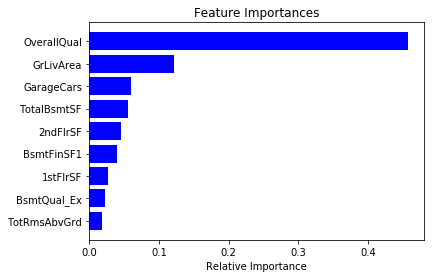

In [762]:
# let's see the most important features
# storing all feature names
feature_names = df.columns[1:]
#feature_names
importances = GDR_model.feature_importances_
indices = np.argsort(importances)[-9:]  # top 10 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [763]:
# Let's see important features in tabular form
import pandas as pd
feature_importances = pd.DataFrame(GDR_model.feature_importances_,index =  df.columns[1:],
                                    columns=['importance']).sort_values('importance',ascending=False)
feature_importances[:10]

,importance
OverallQual,0.456831
GrLivArea,0.122386
GarageCars,0.060681
TotalBsmtSF,0.055530
2ndFlrSF,0.046440
BsmtFinSF1,0.040051
1stFlrSF,0.027043
BsmtQual_Ex,0.022525
TotRmsAbvGrd,0.018315
FullBath,0.013075


Important features are the same as we got from random forest model but importance value was more in random forest than the Gradient 

### Extra  Trees Model

In [764]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import *
def train_and_evaluate(reg, X_train, y_train):
    
    reg.fit(X_train, y_train)
    
    print("Coefficient of determination on training set:",reg.score(X_train, y_train))
    
    # create a k-fold croos validation iterator of k=5 folds
    scores = cross_val_score(reg, X_train, y_train, cv=5)
    print("Average coefficient of determination using 5-fold cross-validation:",np.mean(scores))

In [765]:
from sklearn import ensemble
reg_et=ensemble.ExtraTreesRegressor(n_estimators=10,random_state=42)
train_and_evaluate(reg_et,X_train,y_train)

Coefficient of determination on training set: 1.0
Average coefficient of determination using 5-fold cross-validation: 0.8117257025397182


In [766]:
from sklearn import ensemble
reg_et=ensemble.ExtraTreesRegressor(n_estimators=10,random_state=42)
#train_and_evaluate(reg_et,X_train,y_train)
reg_et.fit(X_train, y_train)
y_pred_et = reg_et.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_et))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_et))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Gradient Boosting R squared": %.4f' % reg_et.score(X_test, y_test))

Mean Absolute Error: 18107.89497716895
Mean Squared Error: 798298134.2332877
Root Mean Squared Error: 26294.002820334124
Gradient Boosting R squared": 0.8506


In [767]:
scores = cross_val_score(reg_et, X_train, y_train, cv=5)
print("Average coefficient of determination using 5-fold cross-validation:",np.mean(scores))

Average coefficient of determination using 5-fold cross-validation: 0.8117257025397182


This looks good with almost consistent R^2 in both ways, just 4 points away

### Ridge Model

In [774]:
# Ridge Regression
import numpy as np
from sklearn import datasets
from sklearn.linear_model import Ridge
# load the diabetes datasets
#dataset = datasets.load_diabetes()
# fit a ridge regression model to the data
R_model = Ridge(alpha=0.1,random_state=42)
R_model.fit(X_train, y_train)
#print(model)
# make predictions
R_predicted = R_model.predict(X_test)
# summarize the fit of the model
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, R_predicted)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, R_predicted))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, R_predicted)))
print('Ridge Regression R squared": %.4f' % R_model.score(X_test, y_test))

Mean Absolute Error: 18017.711787037028
Mean Squared Error: 649831232.111586
Root Mean Squared Error: 25491.7875424927
Ridge Regression R squared": 0.8784


In [775]:
scores = cross_val_score(R_model, X_train, y_train, cv=5)
print("Average coefficient of determination using 5-fold cross-validation:",np.mean(scores))

Average coefficient of determination using 5-fold cross-validation: 0.7196982740424532


Average R^2 cross-validated value has decreased by 16 points

### Lasso Model

In [776]:
# Lasso Regression
# fit a LASSO model to the data
from sklearn.linear_model import Lasso
L_model = Lasso(alpha=0.1,random_state=42)
L_model.fit(X_train, y_train)
#print(L_model)
# make predictions
L_predicted = L_model.predict(X_test)
# summarize the fit of the model
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, L_predicted)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, L_predicted))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, L_predicted)))
print('Ridge Regression R squared": %.4f' % L_model.score(X_test, y_test))

Mean Absolute Error: 17926.35580831423
Mean Squared Error: 636035097.5746531
Root Mean Squared Error: 25219.736270917925
Ridge Regression R squared": 0.8809


In [777]:
scores = cross_val_score(L_model, X_train, y_train, cv=5)
print("Average coefficient of determination using 5-fold cross-validation:",np.mean(scores))

Average coefficient of determination using 5-fold cross-validation: 0.7172175099016282


### Elastic Net Model

In [778]:
# ElasticNet Regression
# fit a model to the data
from sklearn.linear_model import ElasticNet
ET_model = ElasticNet(alpha=0.1,random_state=42)
ET_model.fit(X_train, y_train)
#print(model)
# make predictions
ET_predicted = ET_model.predict(X_test)
# summarize the fit of the model
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, ET_predicted)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, ET_predicted))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, ET_predicted)))
print('Ridge Regression R squared": %.4f' % ET_model.score(X_test, y_test))

Mean Absolute Error: 16873.85854134358
Mean Squared Error: 568737718.2360309
Root Mean Squared Error: 23848.222538294776
Ridge Regression R squared": 0.8935


In [779]:
scores = cross_val_score(ET_model, X_train, y_train, cv=5)
print("Average coefficient of determination using 5-fold cross-validation:",np.mean(scores))

Average coefficient of determination using 5-fold cross-validation: 0.7493710601818953


## Conclusion:  
After running various training models and evaluating the testing model, difficult to choose when many showing overfitting.

After analyzing all results,Gradient Boosting model looked promising with average cross-validated R^2=82% and low MSEas well. Based on the logic of "Select either a high R2 or a low MSE".
We can see that 82% of the variability in Y can be explained using X if we use gradient boosting model.Moreover, MSE value is lowest in this model as compared all other models and we know that the smaller MSE is, the closer the model prediction is to the actual data.Therefore, I'll select Gradient Boosting Model as my best model !

## Part-2
Here, I fetched both train and test csv files and concatenated them. Then, I performed all preprocessing that I did in Part-1 and Trained the models afterwards. In part-2, I took only those regression methods that performed really well in Part-1.
Started with gradient boosting, Random Forest,Random Forest with important features, Extra Trees, Ridge and lastly elastic net algorithm.
I found that RMSE and R^2 were quite different in part-2 and lower too.

I chose Random Forest as my best model with R^2= 34% and average coefficient of determination using 5-fold cross-validation is 30%. In this model, only 34% of the variability in Y can be explained using X and the Model was able to predict the value of every house in the test set within $50801 of the real price.
As per the important features of the random forest model,  'OverallQual','GrLivArea','TotRmsAbvGrd','TotalBsmtSF','GarageArea','LotArea','BsmtUnfSF' are really impacting the sale price of the house.
The score isn't satisfying one but I'd take it for now. Next time, I'd try to remove the outliers from the data and then train the models.

###  Let's prepare submission.csv file to submit the result on Kaggle website

In [26]:
# Loading both datasets from kaggle
pathname = "C:/Users/email/Downloads/"
df_train= pd.read_csv(pathname + "train.csv") 
df_test = pd.read_csv(pathname + "test.csv")

In [27]:
df = pd.concat([df_train, df_test],ignore_index = True)

In [28]:
df.shape

(2919, 81)

In [29]:
#Dropping Id(non-informative) and all variables with more than 20% null values and also bldgType can be represented by MSSubClass
df1 = df.drop(['Id','Alley','FireplaceQu','PoolQC','MiscFeature','Fence'], axis=1)

In [30]:
# MSSubClass listed as integer but it's a categorical variable, let's convert it
df1['MSSubClass'] = df1['MSSubClass'].astype(object)
#df1.info()

In [31]:
# Filling every categorical column with missing values by its own most frequent value
df1 = df1.apply(lambda x:x.fillna(x.value_counts().index[0]))
# Replacing null values with median for numeric variables
df1.fillna(df1.mean(), inplace=True)

In [32]:
# let's check back NA
nulls = df1.isnull().sum()
nulls[nulls > 0]
# no NA values

Series([], dtype: int64)

In [33]:
# First, designating target variable name
targetName = 'SalePrice'
targetSeries = df1[targetName]
#remove target from current location and insert in column 0
del df1[targetName]
df1.insert(0, targetName, targetSeries)
#targetSeries is the new target 

In [34]:
#df1.head()

In [35]:
# All required packages
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report
from sklearn import tree 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import scipy.stats as ss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import learning_curve, GridSearchCV
import time 
from operator import itemgetter
import os
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

In [36]:
# performing data transformation
for col in df1.columns[1:]:
	attName = col
	dType = df1[col].dtype
	missing = pd.isnull(df1[col]).any()
	uniqueCount = len(df1[attName].value_counts(normalize=False))
	# discretize (create dummies)
	if dType == object:
		df1 = pd.concat([df1, pd.get_dummies(df1[col], prefix=col)], axis=1)
		del df1[attName]

In [37]:
# checking dimension 
df1.shape

(2919, 271)

In [38]:
# Partioning of the data
X =df1.iloc[:,1:].values
y= df1.iloc[:,0].values

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.5, random_state=0)

In [39]:
# let's see the datasets' dimension
# As per instructions on Kaggle, size of train(1460 observations) & test(1459 observations) set have been partitioned
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(1460, 270)
(1460,)
(1459, 270)
(1459,)


#### Random Forest Algorithm

In [40]:
# Trying with 1000 estimators as this gave one of the best score in Part-1
from sklearn.ensemble import RandomForestRegressor

RfModel = RandomForestRegressor(n_estimators=1000, random_state=1)  
RfModel.fit(X_train, y_train)  
y_predRF = RfModel.predict(X_test)
# Evaluating the algorithm
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predRF))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predRF))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predRF)))
print('Random Forest R squared: %.4f' % RfModel.score(X_test, y_test))

Mean Absolute Error: 30964.7380717
Mean Squared Error: 2590396526.19
Root Mean Squared Error: 50895.9382091
Random Forest R squared: 0.3409


In [41]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
scores = cross_val_score(RfModel, X_train, y_train, cv=5)
print("Average coefficient of determination using 5-fold cross-validation:",np.mean(scores))

Average coefficient of determination using 5-fold cross-validation: 0.298551165434


The R^2 =34% is very low and cross-validated performance is around 30% which means only 4% difference than train/test model ....

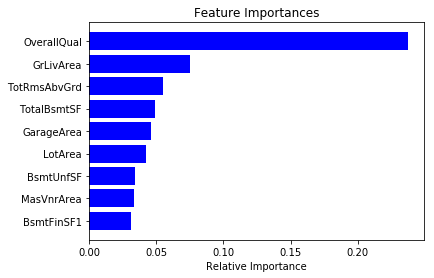

In [42]:
# Finding the most important features
# storing all feature names
feature_names = df1.columns[1:]
#feature_names
importances = RfModel.feature_importances_
indices = np.argsort(importances)[-9:]  # top 10 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [43]:
# Let's see important features in tabular form
import pandas as pd
feature_importances = pd.DataFrame(RfModel.feature_importances_,index =  df1.columns[1:],
                                    columns=['importance']).sort_values('importance',ascending=False)
feature_importances[:10]

,importance
OverallQual,0.237335
GrLivArea,0.075459
TotRmsAbvGrd,0.054894
TotalBsmtSF,0.049028
GarageArea,0.046456
LotArea,0.042323
BsmtUnfSF,0.034421
MasVnrArea,0.033517
BsmtFinSF1,0.030847
WoodDeckSF,0.028332


As we see the above result, overall quality counts for about 24% importance whereas rest of the variables count for less than 10%

In [44]:
# Selecting all important features 
df3 = df1[['SalePrice','OverallQual','GrLivArea','TotRmsAbvGrd','TotalBsmtSF','GarageArea','LotArea','BsmtUnfSF','MasVnrArea','BsmtFinSF1','WoodDeckSF']].copy()
X2 = df3.iloc[:,1:].values 
#X2
y2=df3.iloc[:,0].values
# Partitioning the data with 80/20 split
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=0)

#### Random Forest Model using only important features

In [45]:
# This model with all important features 
from sklearn.ensemble import RandomForestRegressor
RfModel2 = RandomForestRegressor(random_state=1, max_depth=10)
# fitting the model
RfModel2.fit(X2_train,y2_train)
# making predictions
y_pred2 = RfModel2.predict(X2_test)

In [46]:
# Evaluating the algorithm
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y2_test, y_pred2))  
print('Mean Squared Error:', metrics.mean_squared_error(y2_test, y_pred2))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y2_test, y_pred2)))
# let's check r^2
print('Random Forest R squared": %.4f' % RfModel2.score(X2_test, y2_test))

Mean Absolute Error: 30515.8207149
Mean Squared Error: 2078367326.52
Root Mean Squared Error: 45589.114123
Random Forest R squared": 0.2735


Lower R^2 than the original model... 

In [47]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()  
X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test)

#### Gradient Boosting Algorithm

In [48]:
# Training Gradient boosting with default settings
from sklearn import ensemble
from sklearn.ensemble import GradientBoostingRegressor
GDR_model = ensemble.GradientBoostingRegressor()
GDR_model.fit(X_train, y_train)
#p = GDR_model.predict(y_test)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [49]:
from sklearn import metrics
y_pred_GDR = GDR_model.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_GDR))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_GDR))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_GDR)))
print('GDR R squared": %.4f' % GDR_model.score(X_test, y_test))

Mean Absolute Error: 31488.8562497
Mean Squared Error: 2696910627.08
Root Mean Squared Error: 51931.7882138
GDR R squared": 0.3138


In [50]:
scores = cross_val_score(GDR_model, X_train, y_train, cv=5)
print("Average coefficient of determination using 5-fold cross-validation:",np.mean(scores))

Average coefficient of determination using 5-fold cross-validation: 0.256167709977


Gradient boosting  R^2 is not better than Random forest and even average R^2 using cv=5 cross validation 0.7 points away, more variation than Random forest

#### Extra Trees Algorithm

In [51]:
from sklearn import ensemble
from sklearn import metrics
reg_et=ensemble.ExtraTreesRegressor(n_estimators=10,random_state=42)
reg_et.fit(X_train, y_train)
y_pred_et = reg_et.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_et))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_et))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_et)))
print('Extra Trees R squared": %.4f' % reg_et.score(X_test, y_test))

Mean Absolute Error: 32260.4788897
Mean Squared Error: 3026222883.56
Root Mean Squared Error: 55011.116
Extra Trees R squared": 0.2300


In [52]:
scores = cross_val_score(reg_et, X_train, y_train, cv=5)
print("Average coefficient of determination using 5-fold cross-validation:",np.mean(scores))

Average coefficient of determination using 5-fold cross-validation: 0.23793725158


R^2 is very low and proved by cv=5 as well.

#### Ridge Regression

In [53]:
# Ridge Regression
import numpy as np
from sklearn import datasets
from sklearn.linear_model import Ridge
# load the diabetes datasets
#dataset = datasets.load_diabetes()
# fit a ridge regression model to the data
R_model = Ridge(alpha=0.1)
R_model.fit(X_train, y_train)
#print(model)
# make predictions
R_predicted = R_model.predict(X_test)
# summarize the fit of the model
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, R_predicted)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, R_predicted))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, R_predicted)))
print('Ridge Regression R squared": %.4f' % R_model.score(X_test, y_test))

Mean Absolute Error: 33885.0913754
Mean Squared Error: 2786872323.77
Root Mean Squared Error: 52790.835604
Ridge Regression R squared": 0.2909


In [54]:
scores = cross_val_score(R_model, X_train, y_train, cv=5)
print("Average coefficient of determination using 5-fold cross-validation:",np.mean(scores))

Average coefficient of determination using 5-fold cross-validation: 0.194341117725


Ridge R^2 is near to RF and GDR but average R^2 using cv=5 is varying by 10 points

#### ElasticNet Regression

In [55]:
# ElasticNet Regression
# fit a model to the data
from sklearn.linear_model import ElasticNet
ET_model = ElasticNet(alpha=0.1,random_state=0)
ET_model.fit(X_train, y_train)
#print(model)
# make predictions
ET_predicted = ET_model.predict(X_test)
# summarize the fit of the model
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, ET_predicted)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, ET_predicted))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, ET_predicted)))
print('ElasticNet R squared": %.4f' % ET_model.score(X_test, y_test))

Mean Absolute Error: 33176.7667064
Mean Squared Error: 2685766661.23
Root Mean Squared Error: 51824.3828832
ElasticNet R squared": 0.3166


In [56]:
scores = cross_val_score(ET_model, X_train, y_train, cv=5)
print("Average coefficient of determination using 5-fold cross-validation:",np.mean(scores))

Average coefficient of determination using 5-fold cross-validation: 0.238493796002


ElasticNet R^2 is better than Random Forest Model and even cross-validate average R^2 is only 3 points away, lower than Random Forest Model. I'll create submission file using predictions of both ElasticNet and Random Forest Model.

## Finally, creation of submission.csv file

In [670]:
# ElasticNet Predictions

#ET_predicted[:5]

# converting nd.array to data frame
#dataET = ET_predicted.reshape(-1,1)

#len(dataET)

#dataframeET = pd.DataFrame.from_records(dataET)
dataframe[:3]

,0
0,143706.599
1,137693.599
2,175745.007


In [680]:
import pandas as pd
import numpy as np
# save progress to csv
#dataframeET.to_csv('Kaggle_predET.csv', sep=',', index=False)

# Reading the data
#pathname = "C:/Users/email/Downloads/"
#dfET = pd.read_csv(pathname + "Kaggle_predET.csv",header = None,encoding="utf-8", skiprows=1)

#dfET.shape

# inserting ID column
#dfET.insert(0,'Id', range(1461, 1461+len(df)))
#dfET[:3]

# Naming two columns
#dfET = dfET.set_axis(['Id','SalePrice'],axis='columns', inplace=False)
#dfET[:3]

# creating submission file
#dfET.to_csv('submission.csv', sep=',', index=False)

In [529]:
# Random Forest Predictions
y_predRF[:5]

array([143706.599, 137693.599, 175745.007, 139306.435, 117376.333])

In [530]:
# converting nd.array to data frame
data = y_predRF.reshape(-1,1)
len(data)
dataframe = pd.DataFrame.from_records(data)
#dataframe[:3]

In [537]:
# Reading the data
pathname = "C:/Users/email/Downloads/"

df = pd.read_csv(pathname + "Kaggle_pred2.csv",header = None,encoding="utf-8", skiprows=1)
df.shape

(1459, 1)

In [538]:
# inserting ID column
df.insert(0,'Id', range(1461, 1461+len(df)))
df[:3]

,Id,0
0,1461,143748.749
1,1462,137780.849
2,1463,175721.007


In [539]:
# Naming two columns
df = df.set_axis(['Id','SalePrice'],axis='columns', inplace=False)
df[:3]

,Id,SalePrice
0,1461,143748.749
1,1462,137780.849
2,1463,175721.007


In [540]:
df.shape
# creating submission file
#df.to_csv('submission.csv', sep=',', index=False)

(1459, 2)

#                                                                               The end: